# Assignment 5
### Do all four questions.

**1.** Let's review some basic matrix multiplication. When you have an $M \times N$ matrix $A$ with $M$ rows and $N$ columns, 
$$
A= \left[ \begin{array}{cccc} a_{11} & a_{12} & ... & a_{1N} \\
a_{21} & a_{22} & ... & a_{2N} \\
\vdots & \vdots & ... & \vdots \\
a_{M1} & a_{M2} & ... & a_{MN} 
\end{array} \right],
$$
and you right-multiply it by a vector
$$
x = \left[ \begin{array}{c} x_1 \\ x_2 \\ \vdots \\ x_N 
\end{array} \right],
$$
you get
$$
Ax = \left[ \begin{array}{c} \sum_{i=1}^N a_{1i} x_i \\ \sum_{i=1}^N a_{2i} x_i \\ \vdots \\ \sum_{i=1}^N a_{Mi} x_i 
\end{array} \right].
$$
This is just "matrix row times column vector" element-by-element, stacking the results into a new vector.

For this to make sense, $N$ must be the same for the matrix and the vector, but $M$ can be different from $N$. 

Let's play with some NumPy to see this. First we'll define a matrix $A$:

In [2]:
import numpy as np

A = np.array([ [1,2,3],
              [4,5,6],
              [7,8,9]])
A

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

a. Multiply $A$ times each of the following vectors using the @ operator. Explain which part of the $A$ matrix gets selected and explain why, using the definition of matrix multiplication. 

In [3]:
e_1 = np.array([1,0,0])
e_2 = np.array([0,1,0])
e_3 = np.array([0,0,1])

### a. My Answer

In [4]:
print(A @ e_1)
print(A @ e_2)
print(A @ e_3)

[1 4 7]
[2 5 8]
[3 6 9]


These resulting vectors make sense, because e_1 selects the first column of A, e_2 the second column, and e_3 the third. This is because the indices of our vector correspond to columns in the matrix, i.e. when there's a 1 in the first index of the array, it's multiplied into the first column, when there's a 0 in the second index of the vector, it's multiplied into second column. By setting only one item in the vector to 1 and the others to zero, we effectively return a single column of A since all the other columns are multiplied by zero. 

b. Now multiply $A$ times $u = (1,1,1)$. Explain the logic of the result with the definition of matrix multiplication.

In [5]:
u = np.ones(3)

### b. My Answer

In [6]:
A @ u

array([ 6., 15., 24.])

This returns the sum of each row. This makes sense because u multiplies each value in the row by 1, and by the definition of matrix multiplication we then add each item in the row. 

c. Whenever a matrix has 1's on the diagonal and zeros everywhere else, we call it an **identity matrix**. What happens when you multiple $A$ times $x$ below? What happens when you multiple an identity matrix times any vector? Explain your result with the definition of matrix multiplication.

In [7]:
A = np.array([ [1,0,0],
              [0,1,0],
              [0,0,1]])
x = np.array([-2,4,11])


### c. My Answer

In [8]:
A @ x

array([-2,  4, 11])

Much like part a., here when we multiply x into A, the indices of the rows of A effectively each correspond to the indices of each item in the vector. This is because each time we multiply x into A, only one item is kept while the rest are multiplied by 0, and we do this once for every item. Since the identity matrix behaves like this, any time we multiply an identity matrix by any vector we will get that same vector back.

d. What if every row and column sum to 1, but the 1's are no longer on the diagonal? Multiple $A$ times $X$ below and explain the result. Create another matrix whose rows and columns sum to 1, but is not an identity matrix, and show how it permutes the values of $x$. 

In [9]:
A = np.array([ [0,0,1],
              [1,0,0],
              [0,1,0]])
x = np.array([-2,4,11])


### d. My Answer

In [10]:
A @ x

array([11, -2,  4])

Because the ones are not on the diagonal, the indices of the 1's in the rows of A are not in ascending order (i.e. here it's 3, 1, 2), so the items in x have a different order in the output than they did in x. 

In [11]:
B = np.array([ [1,0,0],
              [0,0,1],
              [0,1,0]])
x = np.array([-2,4,11])

B @ x

array([-2, 11,  4])

e. The next matrix $A$ could be a Markov transition matrix: Its columns sum to 1, and each entry $a_{ij}$ can be interpreted as the proportion of observations who moved from state $j$ to state $i$. Multiply $A$ by each of the vectors $e_1$, $e_2$, and $e_3$, and explain your results.

In [12]:
rng = np.random.default_rng(100)
A = rng.random((3,3)) # Generate a random 3X3 matrix
sums = np.sum(A,axis=0) # Column sums
A = A/sums # Normalize the columns so they sum to 1
print(A)

[[0.50052958 0.24049286 0.18358131]
 [0.02574731 0.39251588 0.37907577]
 [0.47372311 0.36699127 0.43734292]]


### e. My Answer

In [13]:
A @ e_1
A @ e_2
A @ e_3

array([0.18358131, 0.37907577, 0.43734292])

Since we've established that each vector e_1, e_2, and e_3 corresponds to a column that will be selected in A, here multiplying by an e_j vector chooses which j starting position we're transitioning from. The column that is returned contains the probability of transitioning to each i state. 

f. For each of the vectors $e_1, e_2, e_3$, multiple $A$ times that vector 5 times. What answer do you get for each starting vector? Describe the behavior you observe.

In [14]:
print(A @ A @ A @ A @ A @ e_1)
print(A @ A @ A @ A @ A @ e_2)
print(A @ A @ A @ A @ A @ e_3)

[0.29266551 0.27862515 0.42870935]
[0.29197422 0.27979983 0.42822595]
[0.29171646 0.2802254  0.42805814]


For each starting vector we get roughly [0.29, 0.28, 0.43]. It seems that as we continue to multiply A times that vector, the result converges to certain values.

*2.* Let's consider a simple Markov transition matrix over two states:
$$
T = \left[ \begin{array}{cc} p_{1\leftarrow 1} &  p_{1\leftarrow 2} \\
p_{2 \leftarrow 1} & p_{2 \leftarrow 2} \end{array}\right] 
$$
The arrows help visualize the transition a bit: This is the same index notation as usual, $p_{ij}$, but writing it $p_{i \leftarrow j}$ emphasizes that it's the proportion of times that state $j$ transitions to state $i$. Below, $T$ is given by
$$
T = \left[ \begin{array}{cc} .25 & .5 \\
.75 & .5 \end{array}\right].
$$

- Start in state 1, at the initial condition $[1,0]$. Multiply that vector by $T$. Write out the result in terms of the formula and compute the result in a code chunk below. What is this object you're looking at, in terms of proportions and transitions?
- Multiple by $T$ again. What do you get? This isn't a column of $T$. Explain in words what it is. (Hint: A forecast of what in what period?)
- Keep multiplying the current vector of outcomes by $T$. When does it start to settle down without changing further?
- Do the above analysis again, starting from the initial condition $[0,1]$. Do you get a different result?
- The take-away is that, in the long run, these chains settle down into the long-run proportions, and the sensitivity on initial conditions vanishes. 


In [15]:
T = np.array([[ 1/4, 1/2],
                 [ 3/4, 1/2 ]])

### My Answers

In [16]:
x = np.array([1,0])

T @ x

array([0.25, 0.75])

[ 0.25 , 0.5 ] [1]       [ 0.25(1) + 0.5(0)]      [0.25]
                   -->                        --> 
[ 0.75 , 0.5 ] [0]       [ 0.75(1) + 0.5(0)]      [0.75]

This object I'm looking at represents the probability of each transition that originates FROM state 1. 0.25 represents going from states 1 to 1, 0.75 represents going from states 1 to 2. 

(the formatting of this is off, but I hope you can still understand. I'm not sure how I can "write out the result in terms of the formula" without some pretty complex LaTeX)

In [17]:
T @ T @ x

array([0.4375, 0.5625])

Multiplying by T again returns another set of probabilities, this time it is predicting the transitions starting at state 1 (1 to 1, 1 to 2) for two steps down the road. 

In [18]:
print(T @ T @ T @ x, '3 Ts')
print(T @ T @ T @ T @ x, '4 Ts')
print(T @ T @ T @ T @ T @ x, '5 Ts')
print(T @ T @ T @ T @ T @ T @ x, '6 Ts')
print(T @ T @ T @ T @ T @ T @ T @ x, '7 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ x, '8 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '9 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '10 Ts')
print(T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ T @ x, '11 Ts')

[0.390625 0.609375] 3 Ts
[0.40234375 0.59765625] 4 Ts
[0.39941406 0.60058594] 5 Ts
[0.40014648 0.59985352] 6 Ts
[0.39996338 0.60003662] 7 Ts
[0.40000916 0.59999084] 8 Ts
[0.39999771 0.60000229] 9 Ts
[0.40000057 0.59999943] 10 Ts
[0.39999986 0.60000014] 11 Ts


Continuing to multiply the vector outcomes by T, the result begins to settle down when we multiply the vector by T five times, though it does bounce around a little bit from there. 

In [19]:
y = np.array([0,1])

print(T @ y, 'T @ y\n')

print(T @ T @ y, '2 Ts')
print(T @ T @ T @ y, '3 Ts')
print(T @ T @ T @ T @ y, '4 Ts')
print(T @ T @ T @ T @ T @ y, '5 Ts')
print(T @ T @ T @ T @ T @ T @ y, '6 Ts')
print(T @ T @ T @ T @ T @ T @ T @ y, '7 Ts')

[0.5 0.5] T @ y

[0.375 0.625] 2 Ts
[0.40625 0.59375] 3 Ts
[0.3984375 0.6015625] 4 Ts
[0.40039062 0.59960938] 5 Ts
[0.39990234 0.60009766] 6 Ts
[0.40002441 0.59997559] 7 Ts


We actually get the SAME result in the long run when we change the initial condition to [0,1].

3. Weather data

- Load the `cville_weather.csv` data. This includes data from Jan 4, 2024 to Feb 2, 2025. Are there any missing data issues?
- Based on the precipitation variable, `PRCP`, make a new variable called `rain` that takes the value 1 if `PRCP`>0 and 0 otherwise.
- Build a two-state Markov chain over the states 0 and 1 for the `rain` variable. 
- For your chain from c, how likely is it to rain if it was rainy yesterday? How likely is it to rain if it was clear yesterday?
- Starting from a clear day, forecast the distribution. How quickly does it converge to a fixed result? What if you start from a rainy day?
- Conditional on being rainy, plot a KDE of the `PRCP` variable.
- Describe one way of making your model better for forecasting and simulation the weather.

Congratulations, you now are a non-parametric meteorologist!

In [20]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
cvilleweather = pd.read_csv('cville_weather.csv')

In [35]:
rain = [1 if item > 0.0 else 0 for item in cvilleweather['PRCP']]
cvilleweather['rain'] = rain

In [40]:
# Making transition matrix
rain_unique = set(cvilleweather['rain'])
rain_unique = list(rain_unique)
Z=len(rain_unique)
weather_counts = np.zeros((Z,Z))

# Compute transition counts
for t in range(1, len(cvilleweather)):
    previous = cvilleweather['rain'][t-1]
    current = cvilleweather['rain'][t]
    weather_counts[previous][current] += 1

print('Weather Counts\n', weather_counts)

Weather Counts
 [[169.  62.]
 [ 63. 116.]]


In [41]:
# Sum the total in each column
w_sums = weather_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(w_sums)

# Normalize transition count matrix to get proportions 
# by dividing the column sums
w_tr_pr = np.divide(weather_counts, w_sums,
                  out=np.zeros_like(weather_counts),
                  where=w_sums!=0)
print('State proportions: \n')
w_tr_df = pd.DataFrame(np.round(w_tr_pr,2), index=rain_unique, columns=rain_unique)
print(w_tr_df)

State proportions: 

[[232. 178.]]
State proportions: 

      0     1
0  0.73  0.35
1  0.27  0.65


For my chain, if it was rainy yesterday there's a 65% chance it will rain today, and if it was clear there's only a 35% chance it will rain today. 

In [ ]:
w_tr_df = w_tr_df.to_numpy()

In [51]:
v = np.array([1,0])

print(w_tr_df @ v, 'T @ y\n')

print(w_tr_df @ w_tr_df @ v, '2 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ v, '3 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '4 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '5 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '6 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '7 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '8 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '9 Ts')

[0.73 0.27] T @ y

[0.6274 0.3726] 2 Ts
[0.588412 0.411588] 3 Ts
[0.57359656 0.42640344] 4 Ts
[0.56796669 0.43203331] 5 Ts
[0.56582734 0.43417266] 6 Ts
[0.56501439 0.43498561] 7 Ts
[0.56470547 0.43529453] 8 Ts
[0.56458808 0.43541192] 9 Ts


In [48]:
v = np.array([0,1])

print(w_tr_df @ v, 'T @ y\n')

print(w_tr_df @ w_tr_df @ v, '2 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ v, '3 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '4 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '5 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '6 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '7 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '8 Ts')
print(w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ w_tr_df @ v, '9 Ts')

[0.35 0.65] T @ y

[0.483 0.517] 2 Ts
[0.53354 0.46646] 3 Ts
[0.5527452 0.4472548] 4 Ts
[0.56004318 0.43995682] 5 Ts
[0.56281641 0.43718359] 6 Ts
[0.56387023 0.43612977] 7 Ts
[0.56427069 0.43572931] 8 Ts
[0.56442286 0.43557714] 9 Ts


Both when starting from a clear day (first code block) and from a rainy day (second code block) it takes roughly 9 instances for the distribution to converge. 

0.02


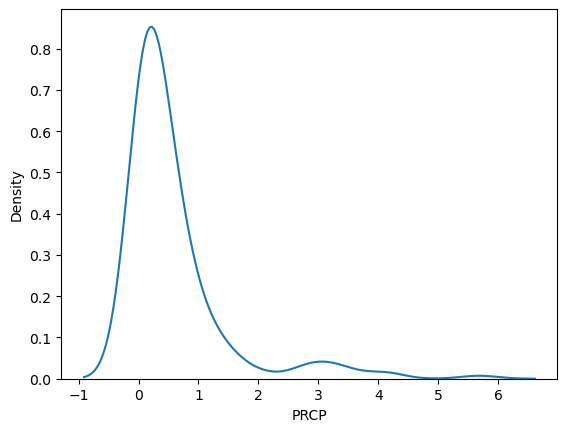

In [ ]:
import seaborn as sns
sns.kdeplot(cvilleweather[cvilleweather['rain'] == 1]['PRCP'])

I may make my model better by creating new states that are dependent on weather related variables, for example, a 4x4 matrix with clear and low temperatures, clear and high temperatures, rainy and low temperatures, rainy and high temperatures. I could add in air pressure and such as well.

4. Taxicab trajectories: Using the pickled taxicab data, we want to complete the exercise from class.

- For the taxicab trajectory data, determine your state space and clean your sequences of cab rides.
- Compute the transition matrix for the taxicab data between neighborhoods in Manhattan. Plot it in a heat map. What are the most common routes?
- Explain why taxicabs are most likely order 1, and not 2 or more.
- Starting at Hell's Kitchen, create a sequence of forecasts of where the cab is likely to be in 2, 3, 5, and 10 trips
- Starting at any neighborhood, iterate your forecast until it is no longer changing very much. Where do cabs spend most of their time working in Manhattan?

(The following code is written with guidance from Terry)

In [22]:
with open('taxicab.pkl', 'rb') as f:
    data = pickle.load(f)

print(len(data))
data[0]

print(type(data[2]))

1000
<class 'pandas.core.series.Series'>


In [130]:
# Investigating all the states
print(len(set(data[0])))
print(set(data[0]))
print(set(data[1]))
print(set(data[2]))

33
{'Gramercy', 'Kips Bay', 'Upper East Side', 'Stuyvesant Town', 'SoHo', 'Outside Manhattan', 'Theater District', 'Lower East Side', 'Murray Hill', 'Flatiron District', 'Central Park', "Hell's Kitchen", 'Greenwich Village', 'Tribeca', 'Midtown', 'East Village', 'Upper West Side', 'Inwood', 'Battery Park City', 'Nolita', 'Roosevelt Island', 'Two Bridges', 'West Village', 'Chelsea', 'Harlem', 'Washington Heights', 'Morningside Heights', 'NoHo', 'Financial District', 'Little Italy', 'Civic Center', 'Chinatown', 'East Harlem'}
{'Gramercy', 'Kips Bay', 'Upper East Side', 'Stuyvesant Town', 'SoHo', 'Outside Manhattan', 'Theater District', 'Murray Hill', 'Flatiron District', 'Lower East Side', 'Central Park', "Hell's Kitchen", 'Greenwich Village', 'Tribeca', 'Midtown', 'East Village', 'Upper West Side', 'Inwood', 'Battery Park City', "Randall's Island", 'Nolita', 'Roosevelt Island', 'Two Bridges', 'Marble Hill', 'West Village', 'Chelsea', 'Harlem', 'Washington Heights', 'Morningside Heights'

In [131]:
# Getting unique rows from the data?
states = set(data[0])
for i in range(1,len(data)):
    trip_i = set(data[i])
    states = states.union(trip_i)
states = list(states)

In [132]:
states

['Gramercy',
 'Kips Bay',
 'Upper East Side',
 'Stuyvesant Town',
 'SoHo',
 'Outside Manhattan',
 'Theater District',
 'Lower East Side',
 'Murray Hill',
 'Flatiron District',
 'Central Park',
 "Hell's Kitchen",
 'Greenwich Village',
 'Tribeca',
 'Midtown',
 'East Village',
 'Upper West Side',
 'Inwood',
 'Battery Park City',
 'Governors Island',
 "Randall's Island",
 'Liberty Island',
 'Nolita',
 'Roosevelt Island',
 'Two Bridges',
 'Marble Hill',
 'West Village',
 'Chelsea',
 'Harlem',
 'Washington Heights',
 'Morningside Heights',
 'NoHo',
 'Ellis Island',
 'Financial District',
 'Little Italy',
 'Civic Center',
 'Chinatown',
 'East Harlem']

In [133]:
## Compute transition counts
S = len(states)
tr_counts = np.zeros((S,S))

for trip in data:
    seq = np.array(trip)
    for t in range(1, len(seq)):
        # Current and next tokens
        x_tm1 = seq[t-1] # previous state
        x_t = seq[t] # current state
        # Determine transition indices:
        index_from = states.index(x_tm1)
        index_to = states.index(x_t)
        # Update transition counts
        tr_counts[index_from, index_to] += 1

print('Transition Counts\n', tr_counts)

Transition Counts
 [[8.804900e+04 3.121100e+04 2.758700e+04 ... 9.460000e+02 2.102000e+03
  2.399000e+03]
 [2.753800e+04 9.787300e+04 3.527500e+04 ... 7.030000e+02 1.409000e+03
  3.111000e+03]
 [2.607700e+04 3.390700e+04 1.283151e+06 ... 1.983000e+03 2.634000e+03
  8.978800e+04]
 ...
 [7.960000e+02 6.620000e+02 1.689000e+03 ... 5.493000e+03 1.915000e+03
  2.090000e+02]
 [2.420000e+03 1.779000e+03 2.506000e+03 ... 2.644000e+03 1.398000e+04
  3.460000e+02]
 [2.049000e+03 2.747000e+03 8.755300e+04 ... 1.710000e+02 2.690000e+02
  7.192200e+04]]


In [134]:
# Sum transititon counts by row (INTO each state):
sums = tr_counts.sum(axis=0, keepdims=True)
print('State proportions: \n')
print(sums)

State proportions: 

[[5.017430e+05 5.077760e+05 2.797713e+06 1.112860e+05 5.505970e+05
  2.363961e+06 8.740550e+05 3.705660e+05 6.543970e+05 3.952740e+05
  3.701250e+05 1.224325e+06 5.102620e+05 4.086400e+05 3.851929e+06
  8.886440e+05 1.803491e+06 1.431200e+04 2.292330e+05 1.200000e+01
  3.603000e+03 1.000000e+00 1.063770e+05 8.010000e+03 1.038800e+04
  4.930000e+02 8.393620e+05 1.978283e+06 2.171620e+05 7.253000e+04
  1.627050e+05 1.743220e+05 3.000000e+00 4.415950e+05 3.859100e+04
  5.790800e+04 1.058730e+05 3.168490e+05]]


In [135]:
# Normalize transition count matrix to get proportions
tr_pr = np.divide(tr_counts, sums,
                  out=np.zeros_like(tr_counts),
                  where=sums!=0)
print('State proportions: \n')
tr_df = pd.DataFrame(np.round(tr_pr,2), index=states, columns=states)
pd.set_option('display.max_columns', 10)
tr_df

State proportions: 



,Gramercy,Kips Bay,Upper East Side,Stuyvesant Town,SoHo,...,Financial District,Little Italy,Civic Center,Chinatown,East Harlem
Gramercy,0.18,0.06,0.01,0.07,0.02,...,0.01,0.01,0.02,0.02,0.01
Kips Bay,0.05,0.19,0.01,0.05,0.01,...,0.01,0.01,0.01,0.01,0.01
Upper East Side,0.05,0.07,0.46,0.05,0.03,...,0.04,0.02,0.03,0.02,0.28
Stuyvesant Town,0.02,0.02,0.00,0.14,0.00,...,0.00,0.00,0.00,0.00,0.00
SoHo,0.02,0.01,0.01,0.02,0.25,...,0.03,0.06,0.06,0.05,0.00
Outside Manhattan,0.05,0.05,0.05,0.07,0.08,...,0.09,0.24,0.24,0.19,0.08
Theater District,0.02,0.02,0.02,0.01,0.02,...,0.02,0.02,0.02,0.02,0.02
Lower East Side,0.03,0.02,0.00,0.03,0.02,...,0.03,0.03,0.02,0.06,0.01
Murray Hill,0.04,0.07,0.02,0.03,0.01,...,0.02,0.01,0.02,0.01,0.01
Flatiron District,0.04,0.03,0.01,0.02,0.02,...,0.01,0.01,0.01,0.01,0.00


In [136]:
#print("Row sums:", tr_df.sum(axis=1))
print("Column sums:", tr_df.sum(axis=0))

Column sums: Gramercy               0.99
Kips Bay               0.98
Upper East Side        0.98
Stuyvesant Town        0.98
SoHo                   1.01
Outside Manhattan      0.99
Theater District       0.97
Lower East Side        0.98
Murray Hill            1.01
Flatiron District      0.98
Central Park           1.00
Hell's Kitchen         1.00
Greenwich Village      0.98
Tribeca                0.99
Midtown                0.99
East Village           0.99
Upper West Side        1.02
Inwood                 0.97
Battery Park City      0.98
Governors Island       0.99
Randall's Island       0.99
Liberty Island         1.00
Nolita                 0.98
Roosevelt Island       0.99
Two Bridges            0.99
Marble Hill            1.01
West Village           0.99
Chelsea                0.99
Harlem                 1.00
Washington Heights     1.01
Morningside Heights    0.98
NoHo                   0.99
Ellis Island           0.99
Financial District     0.98
Little Italy           0.97
Civic C

<Axes: >

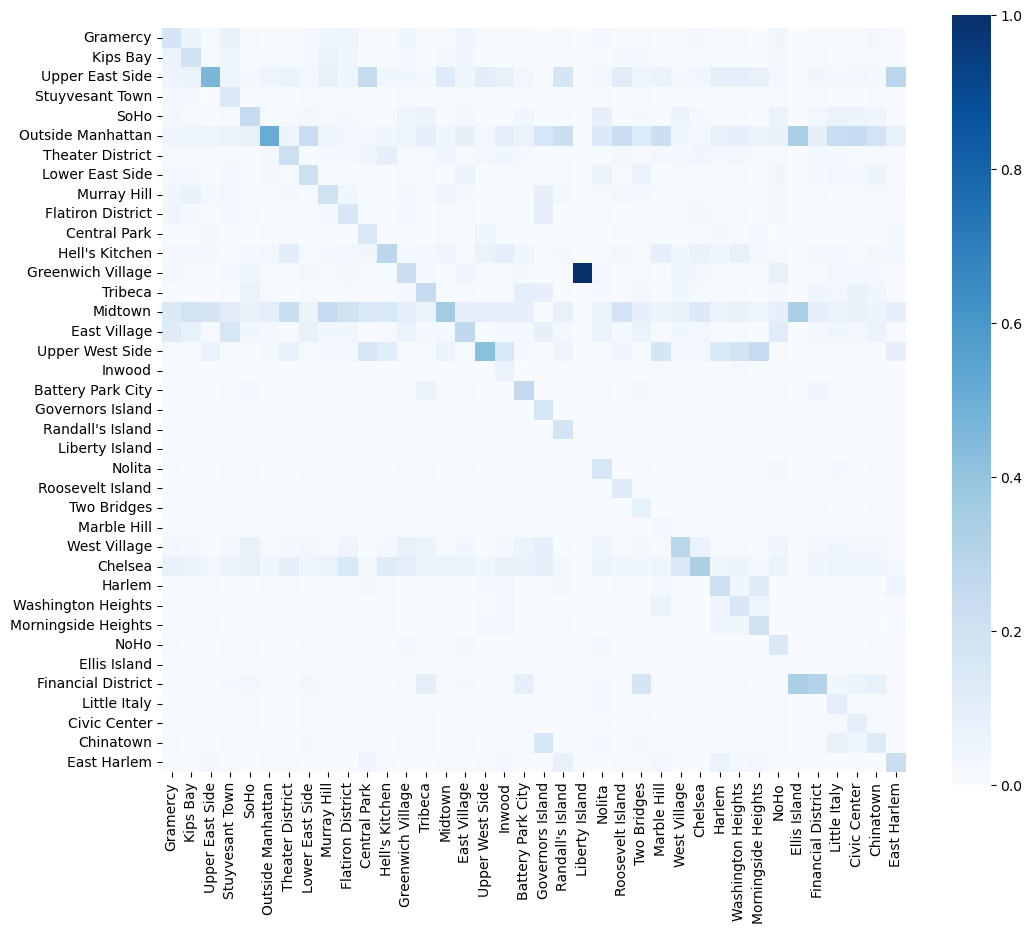

In [137]:
plt.figure(figsize=(12,10))
sns.heatmap(tr_pr,
            cmap='Blues',
            square=True,
            xticklabels=states,
            yticklabels=states,)

From the heatmap, it looks like the trip from Liberty Island to Greenwich Village is the most common. 

Taxi cab paths are most likely order 1 and not order 2 because the destination really only depends on the location that the current person is leaving from. The trip 2 stops ago was likely a different person with plans unrelated to those of the person we're investigating now. 

In [138]:
print(states.index("Hell's Kitchen"))
# Index is 11

HellsKitchen = np.zeros(38)
HellsKitchen[11] = 1

11


In [139]:
twostops = tr_df @ tr_df @ HellsKitchen
print('After two trips:\n\n',twostops)

After two trips:

 Gramercy               0.0181
Kips Bay               0.0168
Upper East Side        0.0836
Stuyvesant Town        0.0010
SoHo                   0.0172
Outside Manhattan      0.0641
Theater District       0.0602
Lower East Side        0.0111
Murray Hill            0.0256
Flatiron District      0.0169
Central Park           0.0178
Hell's Kitchen         0.1183
Greenwich Village      0.0174
Tribeca                0.0148
Midtown                0.1736
East Village           0.0230
Upper West Side        0.1075
Inwood                 0.0002
Battery Park City      0.0102
Governors Island       0.0000
Randall's Island       0.0000
Liberty Island         0.0000
Nolita                 0.0010
Roosevelt Island       0.0000
Two Bridges            0.0001
Marble Hill            0.0000
West Village           0.0364
Chelsea                0.1117
Harlem                 0.0105
Washington Heights     0.0021
Morningside Heights    0.0087
NoHo                   0.0035
Ellis Island         

In [140]:
threestops = tr_df @ tr_df @ tr_df @ HellsKitchen
print('After three trips:\n\n',threestops)

After three trips:

 Gramercy               0.021296
Kips Bay               0.019560
Upper East Side        0.107359
Stuyvesant Town        0.001814
SoHo                   0.020530
Outside Manhattan      0.078378
Theater District       0.047177
Lower East Side        0.012553
Murray Hill            0.027395
Flatiron District      0.018834
Central Park           0.018976
Hell's Kitchen         0.075411
Greenwich Village      0.020438
Tribeca                0.016248
Midtown                0.172844
East Village           0.030349
Upper West Side        0.095560
Inwood                 0.000248
Battery Park City      0.009750
Governors Island       0.000000
Randall's Island       0.000000
Liberty Island         0.000000
Nolita                 0.001823
Roosevelt Island       0.000000
Two Bridges            0.000153
Marble Hill            0.000000
West Village           0.037186
Chelsea                0.098823
Harlem                 0.010138
Washington Heights     0.002432
Morningside Heights

In [141]:
fivestops = tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ HellsKitchen
print('After five trips:\n\n',fivestops)

After five trips:

 Gramercy               0.022563
Kips Bay               0.020698
Upper East Side        0.120354
Stuyvesant Town        0.002387
SoHo                   0.022393
Outside Manhattan      0.090933
Theater District       0.039059
Lower East Side        0.014199
Murray Hill            0.027932
Flatiron District      0.019070
Central Park           0.018176
Hell's Kitchen         0.056898
Greenwich Village      0.021736
Tribeca                0.016654
Midtown                0.166913
East Village           0.035054
Upper West Side        0.082205
Inwood                 0.000220
Battery Park City      0.009447
Governors Island       0.000000
Randall's Island       0.000000
Liberty Island         0.000000
Nolita                 0.002453
Roosevelt Island       0.000000
Two Bridges            0.000188
Marble Hill            0.000000
West Village           0.036484
Chelsea                0.088034
Harlem                 0.009336
Washington Heights     0.002141
Morningside Heights 

In [142]:
tenstops = tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ HellsKitchen
print('After ten trips:\n\n',tenstops)

After ten trips:

 Gramercy               0.021839
Kips Bay               0.020027
Upper East Side        0.116517
Stuyvesant Town        0.002415
SoHo                   0.022028
Outside Manhattan      0.092650
Theater District       0.035951
Lower East Side        0.014296
Murray Hill            0.026890
Flatiron District      0.018240
Central Park           0.016872
Hell's Kitchen         0.051583
Greenwich Village      0.021111
Tribeca                0.016205
Midtown                0.158232
East Village           0.034844
Upper West Side        0.074139
Inwood                 0.000183
Battery Park City      0.009195
Governors Island       0.000000
Randall's Island       0.000000
Liberty Island         0.000000
Nolita                 0.002522
Roosevelt Island       0.000000
Two Bridges            0.000193
Marble Hill            0.000000
West Village           0.034908
Chelsea                0.082280
Harlem                 0.008480
Washington Heights     0.001827
Morningside Heights  

In [155]:
final = tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ tr_df @ HellsKitchen
print(final)
print(max(final))

Gramercy               0.020674
Kips Bay               0.018955
Upper East Side        0.110068
Stuyvesant Town        0.002289
SoHo                   0.020878
Outside Manhattan      0.087905
Theater District       0.033984
Lower East Side        0.013561
Murray Hill            0.025444
Flatiron District      0.017261
Central Park           0.015924
Hell's Kitchen         0.048748
Greenwich Village      0.019994
Tribeca                0.015368
Midtown                0.149626
East Village           0.033021
Upper West Side        0.069928
Inwood                 0.000172
Battery Park City      0.008726
Governors Island       0.000000
Randall's Island       0.000000
Liberty Island         0.000000
Nolita                 0.002394
Roosevelt Island       0.000000
Two Bridges            0.000184
Marble Hill            0.000000
West Village           0.033061
Chelsea                0.077849
Harlem                 0.007989
Washington Heights     0.001715
Morningside Heights    0.004371
NoHo    

When I ran the transitions 16 times in a row above, they were still moving around a bit and not fully converged, but it seems like the cabs in Manhattan spend most of their time in Midtown. 